In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD, RMSprop
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datas = pd.read_csv("/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/pre_processing_data/data_eda.csv")
X = datas[datas.columns[:-1]]
Y = datas['Target'].values

In [3]:
label_mapping = {
    "Dropout":0,
    "Graduate":1,
    "Enrolled":1
}

Y = [label_mapping[i] for i in Y]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=50)

In [5]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
y_train = np.array(y_train)
X_scaled = X.to_numpy()
X_scaled = X_scaled.reshape(X_scaled.shape[0],X_scaled.shape[1],1)
Y_scaled = np.array(Y)

In [9]:
model = Sequential()
model.add(LSTM(64,activation='leaky_relu',input_shape=(X_scaled.shape[1],X_scaled.shape[2]),return_sequences=True))
#model.add(Dense(32, activation='relu'))
model.add(LSTM(32,activation='leaky_relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history = model.fit(X_scaled,Y_scaled,validation_split=0.33,epochs=200,verbose=2)


Epoch 1/200
60/60 - 5s - loss: 0.6811 - accuracy: 0.6873 - val_loss: 0.7457 - val_accuracy: 0.0000e+00 - 5s/epoch - 80ms/step
Epoch 2/200
60/60 - 1s - loss: 0.6607 - accuracy: 0.7068 - val_loss: 0.8084 - val_accuracy: 0.0000e+00 - 1s/epoch - 18ms/step
Epoch 3/200
60/60 - 1s - loss: 0.6350 - accuracy: 0.7068 - val_loss: 0.9318 - val_accuracy: 0.0000e+00 - 1s/epoch - 20ms/step
Epoch 4/200
60/60 - 1s - loss: 0.6016 - accuracy: 0.7068 - val_loss: 1.1702 - val_accuracy: 0.0000e+00 - 1s/epoch - 19ms/step
Epoch 5/200
60/60 - 1s - loss: 0.5938 - accuracy: 0.7068 - val_loss: 1.2174 - val_accuracy: 0.0000e+00 - 1s/epoch - 21ms/step
Epoch 6/200
60/60 - 1s - loss: 0.5964 - accuracy: 0.7068 - val_loss: 1.1984 - val_accuracy: 0.0000e+00 - 1s/epoch - 21ms/step
Epoch 7/200
60/60 - 1s - loss: 0.5943 - accuracy: 0.7068 - val_loss: 1.2166 - val_accuracy: 0.0000e+00 - 1s/epoch - 22ms/step
Epoch 8/200
60/60 - 1s - loss: 0.5950 - accuracy: 0.7068 - val_loss: 1.1723 - val_accuracy: 0.0000e+00 - 1s/epoch - 25

In [10]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_accuracy = history.history["val_accuracy"]

In [14]:
def plot_valid_train(train,valid,title,label_x,label_y):
    epoch=len(train)
    plt.plot(range(1,epoch+1),train,label="Train",color='b')
    plt.plot(range(1,epoch+1),valid,label="Validation",color='g')
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.grid()
    plt.legend()
    plt.show()

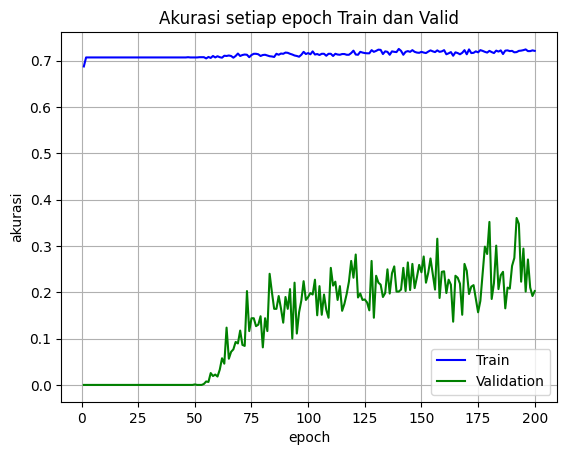

In [15]:
plot_valid_train(train_accuracy,valid_accuracy,"Akurasi setiap epoch Train dan Valid","epoch","akurasi")

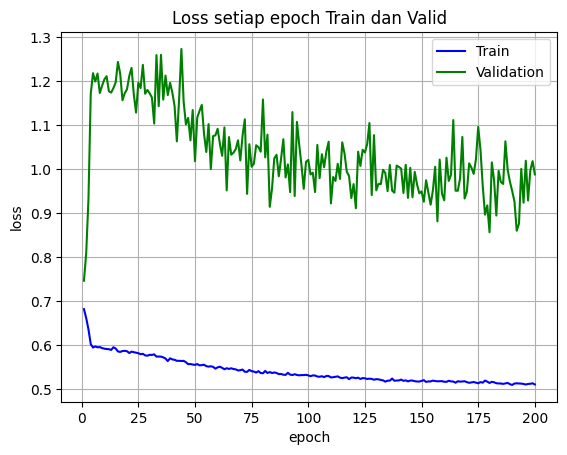

In [16]:
#plot loss
plot_valid_train(train_loss,valid_loss,"Loss setiap epoch Train dan Valid","epoch","loss")

In [17]:
from sklearn.model_selection import StratifiedKFold
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True,random_state=22)

for index_train, index_test in skf.split(X_scaled,Y_scaled):
    train_x, test_x = X_scaled[index_train],X_scaled[index_test]
    train_y, test_y = Y_scaled[index_train], Y_scaled[index_test]


    model.fit(train_x,train_y,epochs=200,verbose=0)
    scores = model.evaluate(test_x,test_y, verbose=0)

    print("Validation accuracy: {:.2f}%".format(scores[1] * 100))

Validation accuracy: 74.69%
Validation accuracy: 76.23%
Validation accuracy: 80.28%
Validation accuracy: 79.58%
Validation accuracy: 76.58%


In [18]:
model.save("LTSM_Model.h5")

/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
